# Лабораторная работа №5.
## Catboost. Градиентный бустинг

В достаточной степени подробно о градиентном бустинге описано в статье:
* https://habr.com/ru/company/ods/blog/327250/

Документация Catboost доступна по ссылке:
* https://tech.yandex.ru/catboost/

In [3]:
#!pip install catboost # установим catboost

In [2]:
import numpy as np
import pandas as pd
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head() # четыре признака: sepal_length, sepal_width, petal_length, petal_width

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
pd.unique(iris.species) # классы, которые нужно предсказать

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Задание 1
Преобразуйте метки классов колонки species в численный вид. Просмотрите датасет, постройте графики (гистограммы, зависимости) и очистите его от дубликатов и пустых строк, если таковые имеются.

In [6]:
# Ваш код
p = {'setosa' : 0, 'versicolor' : 1,'virginica' : 2}
iris['species'] = iris['species'].map(p)

C:\Users\skydi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\skydi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\skydi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


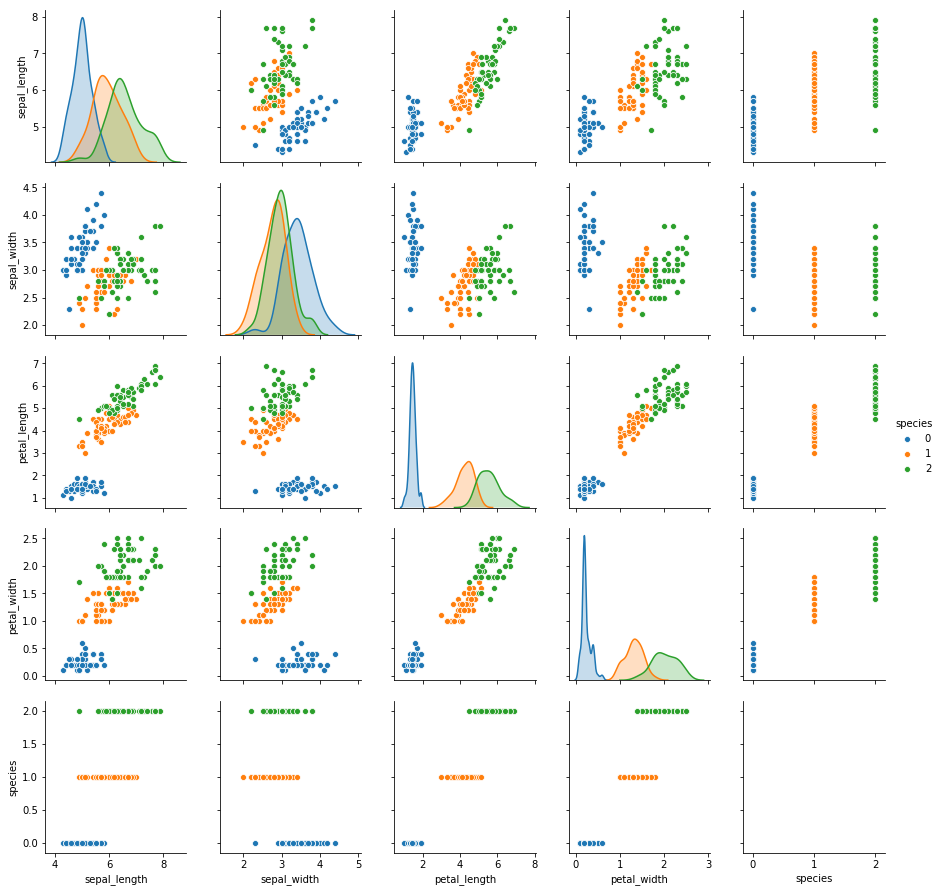

In [7]:
sns.pairplot (iris, hue = "species")

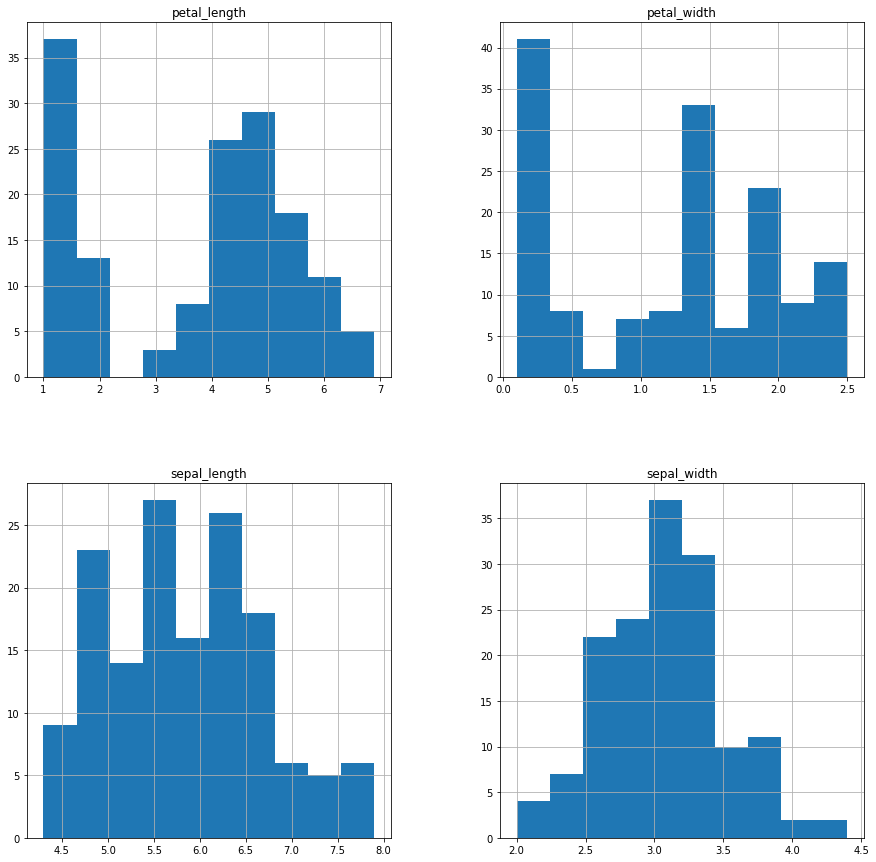

In [9]:
feat = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris[feat].hist(figsize=(15,15));

In [8]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris_up=iris.drop_duplicates(subset=None , keep='first', inplace=False ) 
iris_up.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Задание 2
Получите новые бинарные признаки, например: постройте график зависимости iris.sepal_length от iris.sepal_width и окрасьте точки в зависимости от iris.species. Мы видим, что один класс можно легко выделить, если взять iris.sepal_length < 6 и iris.sepal_width > 3. Создайте 5 бинарных признаков.

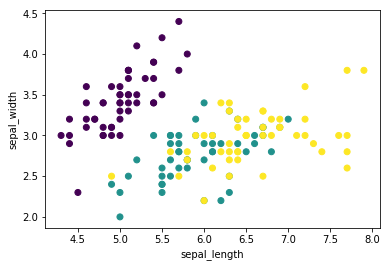

In [10]:
# Ваш код
x = iris_up.sepal_length
y = iris_up.sepal_width  
 
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.scatter(x, y, c=iris_up.species)
plt.show()

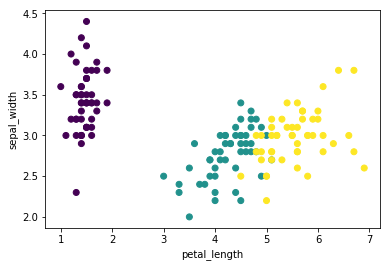

In [52]:
x = iris_up.petal_length
y = iris_up.sepal_width
 
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.scatter(x, y, c=iris_up.species)
plt.show()

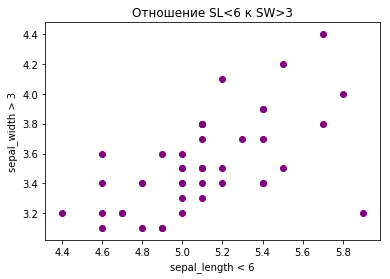

In [58]:
feats = iris_up[(iris_up['sepal_width'] > 3) & (iris_up['sepal_length'] < 6)]

#feats.info()

x_axis = feats.drop(['sepal_width','petal_length','petal_width','species'], axis=1)
y_axis = feats.drop(['sepal_length','petal_length','petal_width','species'], axis=1)

plt.xlabel('sepal_length < 6')
plt.ylabel('sepal_width > 3')
plt.scatter(x_axis,y_axis, c='purple')
plt.title('Отношение SL<6 к SW>3')
plt.show()

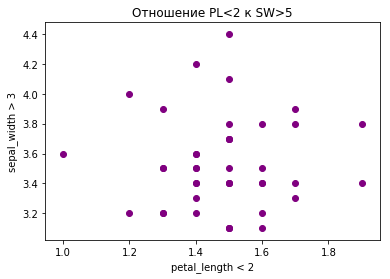

In [88]:
feats1 = iris_up[(iris_up['sepal_width'] > 3) & (iris_up['petal_length'] < 2)]

#feats.info()

x_axis = feats1.drop(['sepal_width','sepal_length','petal_width','species'], axis=1)
y_axis = feats1.drop(['sepal_length','petal_length','petal_width','species'], axis=1)

plt.xlabel('petal_length < 2')
plt.ylabel('sepal_width > 3')
plt.scatter(x_axis,y_axis, c='purple')
plt.title('Отношение PL<2 к SW>5')
plt.show()

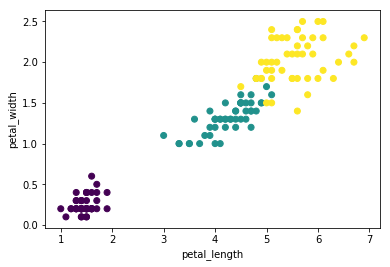

In [60]:
x = iris_up.petal_length
y = iris_up.petal_width
 
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(x, y, c=iris_up.species)
plt.show()

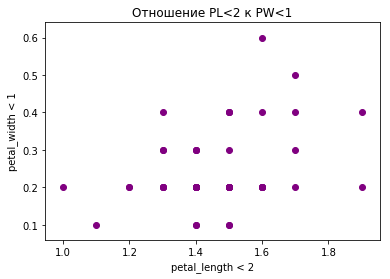

In [61]:
feats2 = iris_up[(iris_up['petal_width'] < 1 ) & (iris_up['petal_length'] < 2)]

#feats.info()

x_axis = feats2.drop(['sepal_width','sepal_length','petal_width','species'], axis=1)
y_axis = feats2.drop(['sepal_length','petal_length','sepal_width','species'], axis=1)

plt.xlabel('petal_length < 2')
plt.ylabel('petal_width < 1')
plt.scatter(x_axis,y_axis, c='purple')
plt.title('Отношение PL<2 к PW<1')
plt.show()

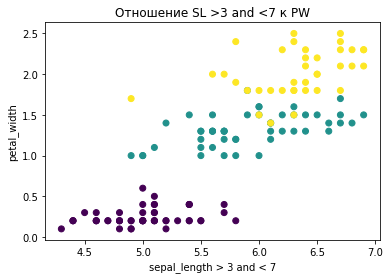

In [76]:
feats3 = iris_up[(iris_up['sepal_length'] > 3) & (iris_up['sepal_length'] < 7)]
 
x = feats3.sepal_length
y = feats3.petal_width

#x.info()
#y.info()

plt.xlabel('sepal_length > 3 and < 7')
plt.ylabel('petal_width')
plt.scatter(x, y, c=feats3.species)
plt.title('Отношение SL >3 and <7 к PW')
plt.show()

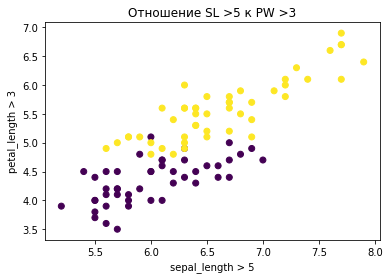

In [80]:
feats4 = iris_up[(iris_up['sepal_length'] > 5) & (iris_up['petal_length'] > 3)]
 
x = feats4.sepal_length
y = feats4.petal_length

#x.info()
#y.info()

plt.xlabel('sepal_length > 5')
plt.ylabel('petal_length > 3')
plt.scatter(x, y, c=feats4.species)
plt.title('Отношение SL >5 к PW >3')
plt.show()

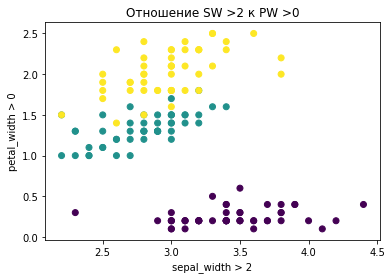

In [85]:
feats5 = iris_up[(iris_up['sepal_width'] > 2) & (iris_up['petal_width'] > 0)]
 
x = feats5.sepal_width
y = feats5.petal_width

#x.info()
#y.info()

plt.xlabel('sepal_width > 2')
plt.ylabel('petal_width > 0')
plt.scatter(x, y, c=feats5.species)
plt.title('Отношение SW >2 к PW >0')
plt.show()

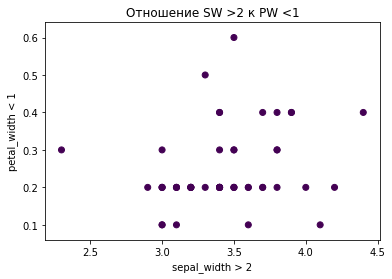

In [86]:
feats5_1 = iris_up[(iris_up['sepal_width'] > 2) & (iris_up['petal_width'] < 1)]
 
x = feats5_1.sepal_width
y = feats5_1.petal_width

#x.info()
#y.info()

plt.xlabel('sepal_width > 2')
plt.ylabel('petal_width < 1')
plt.scatter(x, y, c=feats5_1.species)
plt.title('Отношение SW >2 к PW <1')
plt.show()

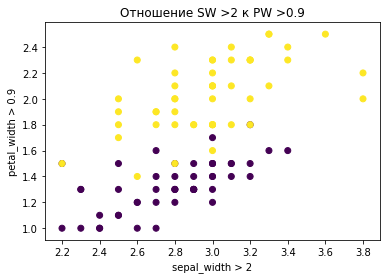

In [89]:
feats5_2 = iris_up[(iris_up['sepal_width'] > 2) & (iris_up['petal_width'] > 0.9)]
 
x = feats5_2.sepal_width
y = feats5_2.petal_width

#x.info()
#y.info()

plt.xlabel('sepal_width > 2')
plt.ylabel('petal_width > 0.9')
plt.scatter(x, y, c=feats5_2.species)
plt.title('Отношение SW >2 к PW >0.9')
plt.show()

### Задание 3
По ссылке https://catboost.ai/docs/concepts/python-usages-examples.html изучите возможности применения catboost.
* Создайте модель Catboost.Classifier
* Перемешайте данные
* Отберите 10 % данных для валидации
* Создайте объекты Pool для классификационных данных и валидационных, заполните cat_features индексами бинарных признаков 
* Выберите функцию ошибки для данной задачи, объясните свой выбор
* Обучите модель и оцените ошибку на валидационных данных, объясните результат

In [12]:
# Ваш код
#!pip install catboost
#!pip install sklearn

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation 
from pandas import DataFrame
import catboost
from catboost import CatBoostClassifier , Pool
%pylab inline

iris = datasets.load_iris()
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame

Populating the interactive namespace from numpy and matplotlib


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


### Создать модель Catboost.Classifier
Не знал как делать цельно, или кусками, повторяя код. Решил сделать кусками, так что простите что код рваный на вид(

In [45]:
model = catboost.CatBoostClassifier(loss_function='MultiClass')
model.fit(iris.data, iris.target)

0:	learn: -1.0571453	total: 43.6ms	remaining: 43.6s
1:	learn: -1.0253734	total: 86.6ms	remaining: 43.2s
2:	learn: -0.9943168	total: 129ms	remaining: 42.9s
3:	learn: -0.9619947	total: 173ms	remaining: 43s
4:	learn: -0.9349442	total: 216ms	remaining: 43.1s
5:	learn: -0.9074621	total: 267ms	remaining: 44.2s
6:	learn: -0.8804732	total: 310ms	remaining: 44s
7:	learn: -0.8565248	total: 356ms	remaining: 44.2s
8:	learn: -0.8287286	total: 387ms	remaining: 42.6s
9:	learn: -0.8031845	total: 432ms	remaining: 42.8s
10:	learn: -0.7787622	total: 481ms	remaining: 43.2s
11:	learn: -0.7570815	total: 532ms	remaining: 43.8s
12:	learn: -0.7344099	total: 578ms	remaining: 43.9s
13:	learn: -0.7150768	total: 622ms	remaining: 43.8s
14:	learn: -0.6952978	total: 671ms	remaining: 44.1s
15:	learn: -0.6768082	total: 718ms	remaining: 44.2s
16:	learn: -0.6607767	total: 771ms	remaining: 44.6s
17:	learn: -0.6437368	total: 826ms	remaining: 45.1s
18:	learn: -0.6268703	total: 876ms	remaining: 45.2s
19:	learn: -0.6121315	to

159:	learn: -0.1046847	total: 7.22s	remaining: 37.9s
160:	learn: -0.1041012	total: 7.27s	remaining: 37.9s
161:	learn: -0.1035772	total: 7.31s	remaining: 37.8s
162:	learn: -0.1030111	total: 7.36s	remaining: 37.8s
163:	learn: -0.1024045	total: 7.42s	remaining: 37.8s
164:	learn: -0.1018382	total: 7.47s	remaining: 37.8s
165:	learn: -0.1013736	total: 7.52s	remaining: 37.8s
166:	learn: -0.1009771	total: 7.56s	remaining: 37.7s
167:	learn: -0.1004988	total: 7.61s	remaining: 37.7s
168:	learn: -0.1000481	total: 7.66s	remaining: 37.7s
169:	learn: -0.0995088	total: 7.71s	remaining: 37.6s
170:	learn: -0.0990568	total: 7.76s	remaining: 37.6s
171:	learn: -0.0985850	total: 7.82s	remaining: 37.6s
172:	learn: -0.0979156	total: 7.86s	remaining: 37.6s
173:	learn: -0.0975279	total: 7.91s	remaining: 37.6s
174:	learn: -0.0971449	total: 7.96s	remaining: 37.5s
175:	learn: -0.0967032	total: 8s	remaining: 37.4s
176:	learn: -0.0961644	total: 8.04s	remaining: 37.4s
177:	learn: -0.0955889	total: 8.09s	remaining: 37

318:	learn: -0.0519421	total: 14.5s	remaining: 31s
319:	learn: -0.0517700	total: 14.6s	remaining: 30.9s
320:	learn: -0.0515283	total: 14.6s	remaining: 30.9s
321:	learn: -0.0513256	total: 14.7s	remaining: 30.9s
322:	learn: -0.0511847	total: 14.7s	remaining: 30.8s
323:	learn: -0.0511027	total: 14.7s	remaining: 30.7s
324:	learn: -0.0509621	total: 14.8s	remaining: 30.7s
325:	learn: -0.0508391	total: 14.8s	remaining: 30.7s
326:	learn: -0.0506621	total: 14.9s	remaining: 30.6s
327:	learn: -0.0505075	total: 14.9s	remaining: 30.6s
328:	learn: -0.0503542	total: 15s	remaining: 30.6s
329:	learn: -0.0502440	total: 15s	remaining: 30.5s
330:	learn: -0.0499239	total: 15.1s	remaining: 30.5s
331:	learn: -0.0497783	total: 15.1s	remaining: 30.4s
332:	learn: -0.0496035	total: 15.2s	remaining: 30.4s
333:	learn: -0.0492381	total: 15.2s	remaining: 30.3s
334:	learn: -0.0491263	total: 15.2s	remaining: 30.2s
335:	learn: -0.0489615	total: 15.3s	remaining: 30.2s
336:	learn: -0.0487943	total: 15.3s	remaining: 30.1s

474:	learn: -0.0328199	total: 21.6s	remaining: 23.8s
475:	learn: -0.0327481	total: 21.6s	remaining: 23.8s
476:	learn: -0.0327206	total: 21.7s	remaining: 23.7s
477:	learn: -0.0326412	total: 21.7s	remaining: 23.7s
478:	learn: -0.0325893	total: 21.7s	remaining: 23.6s
479:	learn: -0.0325097	total: 21.8s	remaining: 23.6s
480:	learn: -0.0323998	total: 21.8s	remaining: 23.6s
481:	learn: -0.0323479	total: 21.9s	remaining: 23.5s
482:	learn: -0.0322089	total: 21.9s	remaining: 23.5s
483:	learn: -0.0320143	total: 22s	remaining: 23.4s
484:	learn: -0.0319426	total: 22s	remaining: 23.4s
485:	learn: -0.0318637	total: 22.1s	remaining: 23.4s
486:	learn: -0.0318132	total: 22.1s	remaining: 23.3s
487:	learn: -0.0316485	total: 22.2s	remaining: 23.3s
488:	learn: -0.0315856	total: 22.2s	remaining: 23.2s
489:	learn: -0.0314833	total: 22.3s	remaining: 23.2s
490:	learn: -0.0313689	total: 22.3s	remaining: 23.1s
491:	learn: -0.0313175	total: 22.4s	remaining: 23.1s
492:	learn: -0.0312830	total: 22.4s	remaining: 23s

630:	learn: -0.0231802	total: 28.6s	remaining: 16.7s
631:	learn: -0.0231396	total: 28.6s	remaining: 16.7s
632:	learn: -0.0230778	total: 28.6s	remaining: 16.6s
633:	learn: -0.0229721	total: 28.7s	remaining: 16.6s
634:	learn: -0.0229357	total: 28.7s	remaining: 16.5s
635:	learn: -0.0228499	total: 28.8s	remaining: 16.5s
636:	learn: -0.0228172	total: 28.8s	remaining: 16.4s
637:	learn: -0.0227892	total: 28.9s	remaining: 16.4s
638:	learn: -0.0227543	total: 28.9s	remaining: 16.3s
639:	learn: -0.0227392	total: 29s	remaining: 16.3s
640:	learn: -0.0227011	total: 29s	remaining: 16.2s
641:	learn: -0.0226383	total: 29s	remaining: 16.2s
642:	learn: -0.0226107	total: 29.1s	remaining: 16.2s
643:	learn: -0.0225925	total: 29.1s	remaining: 16.1s
644:	learn: -0.0225358	total: 29.2s	remaining: 16.1s
645:	learn: -0.0224542	total: 29.2s	remaining: 16s
646:	learn: -0.0224106	total: 29.3s	remaining: 16s
647:	learn: -0.0223925	total: 29.3s	remaining: 15.9s
648:	learn: -0.0222951	total: 29.4s	remaining: 15.9s
649

786:	learn: -0.0174756	total: 35.8s	remaining: 9.69s
787:	learn: -0.0174634	total: 35.8s	remaining: 9.64s
788:	learn: -0.0174548	total: 35.9s	remaining: 9.6s
789:	learn: -0.0174158	total: 36s	remaining: 9.56s
790:	learn: -0.0174009	total: 36s	remaining: 9.51s
791:	learn: -0.0173331	total: 36s	remaining: 9.47s
792:	learn: -0.0173100	total: 36.1s	remaining: 9.42s
793:	learn: -0.0172520	total: 36.1s	remaining: 9.37s
794:	learn: -0.0172311	total: 36.2s	remaining: 9.33s
795:	learn: -0.0172145	total: 36.2s	remaining: 9.28s
796:	learn: -0.0171974	total: 36.3s	remaining: 9.24s
797:	learn: -0.0171848	total: 36.3s	remaining: 9.19s
798:	learn: -0.0171629	total: 36.3s	remaining: 9.14s
799:	learn: -0.0171010	total: 36.4s	remaining: 9.1s
800:	learn: -0.0170871	total: 36.4s	remaining: 9.05s
801:	learn: -0.0170740	total: 36.5s	remaining: 9.01s
802:	learn: -0.0170637	total: 36.5s	remaining: 8.96s
803:	learn: -0.0170481	total: 36.6s	remaining: 8.92s
804:	learn: -0.0170267	total: 36.6s	remaining: 8.88s
8

946:	learn: -0.0139718	total: 43.3s	remaining: 2.42s
947:	learn: -0.0139565	total: 43.4s	remaining: 2.38s
948:	learn: -0.0139465	total: 43.4s	remaining: 2.33s
949:	learn: -0.0139268	total: 43.5s	remaining: 2.29s
950:	learn: -0.0139179	total: 43.5s	remaining: 2.24s
951:	learn: -0.0139016	total: 43.6s	remaining: 2.2s
952:	learn: -0.0138915	total: 43.6s	remaining: 2.15s
953:	learn: -0.0138753	total: 43.7s	remaining: 2.11s
954:	learn: -0.0138689	total: 43.7s	remaining: 2.06s
955:	learn: -0.0138581	total: 43.8s	remaining: 2.02s
956:	learn: -0.0138484	total: 43.8s	remaining: 1.97s
957:	learn: -0.0138356	total: 43.9s	remaining: 1.92s
958:	learn: -0.0138233	total: 43.9s	remaining: 1.88s
959:	learn: -0.0138098	total: 44s	remaining: 1.83s
960:	learn: -0.0138041	total: 44s	remaining: 1.79s
961:	learn: -0.0137577	total: 44.1s	remaining: 1.74s
962:	learn: -0.0137393	total: 44.1s	remaining: 1.69s
963:	learn: -0.0136934	total: 44.2s	remaining: 1.65s
964:	learn: -0.0136778	total: 44.2s	remaining: 1.6s

In [8]:
iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


##### * Перемешайте данные
За перемешивания данных отвечает параметр shuffle, он по умолчанию включен.(Поэтому его не писал в блоке ниже)
##### * Отберите 10 % данных для валидации
test_size=0.1 отбирает 10% данных

In [40]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.1, random_state = 0)

#cat_feat = list(range(0,train_data.shape[1]))
#print (cat_feat)
print (train_data)
print (test_data)
print (train_labels)
print (test_labels)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
37                 4.9               3.6                1.4               0.1
78                 6.0               2.9                4.5               1.5
90                 5.5               2.6                4.4               1.2
45                 4.8               3.0                1.4               0.3
16                 5.4               3.9                1.3               0.4
121                5.6               2.8                4.9               2.0
66                 5.6               3.0                4.5               1.5
24                 4.8               3.4                1.9               0.2
8                  4.4               2.9                1.4               0.2
126                6.2               2.8                4.8               1.8
22                 4.6               3.6                1.0               0.2
44                 5.1               3.8                1.9     

#### * Создайте объекты Pool для классификационных данных и валидационных, заполните cat_features индексами бинарных признаков

In [47]:
#train_pool = Pool(data=train_data1, label=train_labels1) # Отказался от этого пула, так как выходила ошибка.
test_pool = Pool(data=test_data1, label=test_labels1)

models = []
for i in range(5):
    model = CatBoostClassifier(loss_function="MultiClass",iterations=100, random_seed=i)
    model.fit(train_data,train_labels, eval_set=test_pool)
    print('Model is fitted: ' + str(model.is_fitted()))
    print('Model params:')
    print(model.get_params())

0:	learn: -1.0635132	test: -1.0613867	best: -1.0613867 (0)	total: 44ms	remaining: 4.35s
1:	learn: -1.0317043	test: -1.0289571	best: -1.0289571 (1)	total: 85.9ms	remaining: 4.21s
2:	learn: -0.9994328	test: -0.9943413	best: -0.9943413 (2)	total: 128ms	remaining: 4.13s
3:	learn: -0.9667398	test: -0.9618764	best: -0.9618764 (3)	total: 163ms	remaining: 3.92s
4:	learn: -0.9397724	test: -0.9368519	best: -0.9368519 (4)	total: 204ms	remaining: 3.88s
5:	learn: -0.9127369	test: -0.9083315	best: -0.9083315 (5)	total: 246ms	remaining: 3.86s
6:	learn: -0.8870676	test: -0.8851933	best: -0.8851933 (6)	total: 291ms	remaining: 3.86s
7:	learn: -0.8622402	test: -0.8631150	best: -0.8631150 (7)	total: 336ms	remaining: 3.87s
8:	learn: -0.8359444	test: -0.8360091	best: -0.8360091 (8)	total: 382ms	remaining: 3.86s
9:	learn: -0.8137396	test: -0.8141205	best: -0.8141205 (9)	total: 435ms	remaining: 3.92s
10:	learn: -0.7927362	test: -0.7953092	best: -0.7953092 (10)	total: 478ms	remaining: 3.87s
11:	learn: -0.77092

92:	learn: -0.1955186	test: -0.1875553	best: -0.1875553 (92)	total: 4.06s	remaining: 306ms
93:	learn: -0.1931736	test: -0.1847135	best: -0.1847135 (93)	total: 4.11s	remaining: 262ms
94:	learn: -0.1905976	test: -0.1814775	best: -0.1814775 (94)	total: 4.13s	remaining: 218ms
95:	learn: -0.1889369	test: -0.1793749	best: -0.1793749 (95)	total: 4.17s	remaining: 174ms
96:	learn: -0.1864949	test: -0.1769962	best: -0.1769962 (96)	total: 4.22s	remaining: 131ms
97:	learn: -0.1844628	test: -0.1747700	best: -0.1747700 (97)	total: 4.27s	remaining: 87.2ms
98:	learn: -0.1822642	test: -0.1723313	best: -0.1723313 (98)	total: 4.32s	remaining: 43.7ms
99:	learn: -0.1805694	test: -0.1704305	best: -0.1704305 (99)	total: 4.37s	remaining: 0us

bestTest = -0.1704305195
bestIteration = 99

Model is fitted: True
Model params:
{'iterations': 100, 'loss_function': 'MultiClass', 'random_seed': 0}
0:	learn: -1.0601388	test: -1.0600216	best: -1.0600216 (0)	total: 48.8ms	remaining: 4.83s
1:	learn: -1.0290916	test: -1.0

82:	learn: -0.2162140	test: -0.2110965	best: -0.2110965 (82)	total: 3.56s	remaining: 728ms
83:	learn: -0.2135471	test: -0.2088610	best: -0.2088610 (83)	total: 3.6s	remaining: 686ms
84:	learn: -0.2109676	test: -0.2057956	best: -0.2057956 (84)	total: 3.65s	remaining: 643ms
85:	learn: -0.2078297	test: -0.2026968	best: -0.2026968 (85)	total: 3.69s	remaining: 600ms
86:	learn: -0.2055973	test: -0.1999775	best: -0.1999775 (86)	total: 3.73s	remaining: 557ms
87:	learn: -0.2030301	test: -0.1981957	best: -0.1981957 (87)	total: 3.76s	remaining: 513ms
88:	learn: -0.2009737	test: -0.1959431	best: -0.1959431 (88)	total: 3.8s	remaining: 470ms
89:	learn: -0.1987174	test: -0.1927816	best: -0.1927816 (89)	total: 3.85s	remaining: 427ms
90:	learn: -0.1961965	test: -0.1899279	best: -0.1899279 (90)	total: 3.88s	remaining: 384ms
91:	learn: -0.1942904	test: -0.1883163	best: -0.1883163 (91)	total: 3.93s	remaining: 341ms
92:	learn: -0.1925626	test: -0.1863107	best: -0.1863107 (92)	total: 3.97s	remaining: 299ms
9

73:	learn: -0.2439477	test: -0.2383316	best: -0.2383316 (73)	total: 3.26s	remaining: 1.15s
74:	learn: -0.2403645	test: -0.2342887	best: -0.2342887 (74)	total: 3.3s	remaining: 1.1s
75:	learn: -0.2369672	test: -0.2305806	best: -0.2305806 (75)	total: 3.34s	remaining: 1.05s
76:	learn: -0.2338311	test: -0.2270550	best: -0.2270550 (76)	total: 3.38s	remaining: 1.01s
77:	learn: -0.2300492	test: -0.2222249	best: -0.2222249 (77)	total: 3.42s	remaining: 964ms
78:	learn: -0.2269987	test: -0.2189900	best: -0.2189900 (78)	total: 3.47s	remaining: 922ms
79:	learn: -0.2244329	test: -0.2164411	best: -0.2164411 (79)	total: 3.52s	remaining: 879ms
80:	learn: -0.2217016	test: -0.2135176	best: -0.2135176 (80)	total: 3.56s	remaining: 836ms
81:	learn: -0.2190274	test: -0.2110964	best: -0.2110964 (81)	total: 3.61s	remaining: 792ms
82:	learn: -0.2171505	test: -0.2088918	best: -0.2088918 (82)	total: 3.65s	remaining: 748ms
83:	learn: -0.2138708	test: -0.2052486	best: -0.2052486 (83)	total: 3.7s	remaining: 705ms
84

63:	learn: -0.2729035	test: -0.2714079	best: -0.2714079 (63)	total: 2.88s	remaining: 1.62s
64:	learn: -0.2690075	test: -0.2681749	best: -0.2681749 (64)	total: 2.92s	remaining: 1.57s
65:	learn: -0.2649245	test: -0.2644405	best: -0.2644405 (65)	total: 2.96s	remaining: 1.52s
66:	learn: -0.2618071	test: -0.2609742	best: -0.2609742 (66)	total: 3s	remaining: 1.48s
67:	learn: -0.2587719	test: -0.2576508	best: -0.2576508 (67)	total: 3.05s	remaining: 1.44s
68:	learn: -0.2548955	test: -0.2531311	best: -0.2531311 (68)	total: 3.09s	remaining: 1.39s
69:	learn: -0.2513302	test: -0.2485827	best: -0.2485827 (69)	total: 3.13s	remaining: 1.34s
70:	learn: -0.2475374	test: -0.2440763	best: -0.2440763 (70)	total: 3.17s	remaining: 1.29s
71:	learn: -0.2448604	test: -0.2415889	best: -0.2415889 (71)	total: 3.21s	remaining: 1.25s
72:	learn: -0.2411861	test: -0.2374622	best: -0.2374622 (72)	total: 3.25s	remaining: 1.2s
73:	learn: -0.2380856	test: -0.2345950	best: -0.2345950 (73)	total: 3.29s	remaining: 1.16s
74:

56:	learn: -0.3085791	test: -0.3080896	best: -0.3080896 (56)	total: 2.5s	remaining: 1.89s
57:	learn: -0.3043799	test: -0.3042516	best: -0.3042516 (57)	total: 2.55s	remaining: 1.84s
58:	learn: -0.2996128	test: -0.2993947	best: -0.2993947 (58)	total: 2.59s	remaining: 1.8s
59:	learn: -0.2946383	test: -0.2941136	best: -0.2941136 (59)	total: 2.64s	remaining: 1.76s
60:	learn: -0.2895458	test: -0.2881016	best: -0.2881016 (60)	total: 2.67s	remaining: 1.71s
61:	learn: -0.2850384	test: -0.2838838	best: -0.2838838 (61)	total: 2.71s	remaining: 1.66s
62:	learn: -0.2809345	test: -0.2791989	best: -0.2791989 (62)	total: 2.75s	remaining: 1.62s
63:	learn: -0.2765521	test: -0.2746479	best: -0.2746479 (63)	total: 2.8s	remaining: 1.57s
64:	learn: -0.2724423	test: -0.2711177	best: -0.2711177 (64)	total: 2.84s	remaining: 1.53s
65:	learn: -0.2689672	test: -0.2674587	best: -0.2674587 (65)	total: 2.88s	remaining: 1.49s
66:	learn: -0.2652124	test: -0.2650157	best: -0.2650157 (66)	total: 2.94s	remaining: 1.45s
67

#### Выберите функцию ошибки для данной задачи, объясните свой выбор:
Выбрал функцию MultiClass, потомучто она не выдавала ошибку =) 
А если по нормальному, то она используется когда - Цель имее более двух различных значений и border_count параметра Нет.  (MultiClass — The target has more than two different values and the border_count parameter is None.)
#### Обучите модель и оцените ошибку на валидационных данных, объясните результат

In [48]:
cbc = catboost.CatBoostClassifier(loss_function='MultiClass')

cbc.fit(validate_pool)

0:	learn: -1.0770654	total: 22.1ms	remaining: 22.1s
1:	learn: -1.0675122	total: 65.9ms	remaining: 32.9s
2:	learn: -1.0539103	total: 99ms	remaining: 32.9s
3:	learn: -1.0428239	total: 125ms	remaining: 31.2s
4:	learn: -1.0272648	total: 151ms	remaining: 30.1s
5:	learn: -1.0138695	total: 172ms	remaining: 28.4s
6:	learn: -1.0017257	total: 212ms	remaining: 30.1s
7:	learn: -0.9937222	total: 248ms	remaining: 30.7s
8:	learn: -0.9835970	total: 298ms	remaining: 32.8s
9:	learn: -0.9721541	total: 338ms	remaining: 33.5s
10:	learn: -0.9639909	total: 384ms	remaining: 34.6s
11:	learn: -0.9458698	total: 410ms	remaining: 33.7s
12:	learn: -0.9348624	total: 457ms	remaining: 34.7s
13:	learn: -0.9263976	total: 491ms	remaining: 34.6s
14:	learn: -0.9122750	total: 512ms	remaining: 33.6s
15:	learn: -0.9008143	total: 559ms	remaining: 34.4s
16:	learn: -0.8842500	total: 580ms	remaining: 33.5s
17:	learn: -0.8737580	total: 601ms	remaining: 32.8s
18:	learn: -0.8590567	total: 632ms	remaining: 32.7s
19:	learn: -0.8498717

158:	learn: -0.2101419	total: 5.18s	remaining: 27.4s
159:	learn: -0.2081968	total: 5.2s	remaining: 27.3s
160:	learn: -0.2062806	total: 5.22s	remaining: 27.2s
161:	learn: -0.2048201	total: 5.25s	remaining: 27.2s
162:	learn: -0.2032638	total: 5.28s	remaining: 27.1s
163:	learn: -0.2017176	total: 5.31s	remaining: 27.1s
164:	learn: -0.1998963	total: 5.33s	remaining: 27s
165:	learn: -0.1984759	total: 5.37s	remaining: 27s
166:	learn: -0.1967017	total: 5.39s	remaining: 26.9s
167:	learn: -0.1949531	total: 5.41s	remaining: 26.8s
168:	learn: -0.1932297	total: 5.43s	remaining: 26.7s
169:	learn: -0.1915310	total: 5.45s	remaining: 26.6s
170:	learn: -0.1903383	total: 5.49s	remaining: 26.6s
171:	learn: -0.1888925	total: 5.52s	remaining: 26.6s
172:	learn: -0.1872553	total: 5.54s	remaining: 26.5s
173:	learn: -0.1856413	total: 5.57s	remaining: 26.4s
174:	learn: -0.1840498	total: 5.59s	remaining: 26.4s
175:	learn: -0.1828039	total: 5.63s	remaining: 26.4s
176:	learn: -0.1813970	total: 5.66s	remaining: 26.3

314:	learn: -0.0826975	total: 9.44s	remaining: 20.5s
315:	learn: -0.0824506	total: 9.48s	remaining: 20.5s
316:	learn: -0.0821640	total: 9.51s	remaining: 20.5s
317:	learn: -0.0817686	total: 9.53s	remaining: 20.4s
318:	learn: -0.0813766	total: 9.55s	remaining: 20.4s
319:	learn: -0.0810276	total: 9.57s	remaining: 20.3s
320:	learn: -0.0806815	total: 9.6s	remaining: 20.3s
321:	learn: -0.0804395	total: 9.64s	remaining: 20.3s
322:	learn: -0.0801001	total: 9.67s	remaining: 20.3s
323:	learn: -0.0798674	total: 9.71s	remaining: 20.3s
324:	learn: -0.0794915	total: 9.73s	remaining: 20.2s
325:	learn: -0.0791189	total: 9.76s	remaining: 20.2s
326:	learn: -0.0788670	total: 9.8s	remaining: 20.2s
327:	learn: -0.0785676	total: 9.82s	remaining: 20.1s
328:	learn: -0.0783133	total: 9.86s	remaining: 20.1s
329:	learn: -0.0779504	total: 9.88s	remaining: 20.1s
330:	learn: -0.0775905	total: 9.9s	remaining: 20s
331:	learn: -0.0772937	total: 9.92s	remaining: 20s
332:	learn: -0.0770516	total: 9.96s	remaining: 20s
33

471:	learn: -0.0495733	total: 14s	remaining: 15.7s
472:	learn: -0.0494599	total: 14.1s	remaining: 15.7s
473:	learn: -0.0493321	total: 14.1s	remaining: 15.7s
474:	learn: -0.0491759	total: 14.1s	remaining: 15.6s
475:	learn: -0.0490206	total: 14.2s	remaining: 15.6s
476:	learn: -0.0489165	total: 14.2s	remaining: 15.6s
477:	learn: -0.0487846	total: 14.3s	remaining: 15.6s
478:	learn: -0.0486316	total: 14.3s	remaining: 15.5s
479:	learn: -0.0485545	total: 14.3s	remaining: 15.5s
480:	learn: -0.0484193	total: 14.4s	remaining: 15.5s
481:	learn: -0.0482847	total: 14.4s	remaining: 15.5s
482:	learn: -0.0481346	total: 14.4s	remaining: 15.4s
483:	learn: -0.0480251	total: 14.4s	remaining: 15.4s
484:	learn: -0.0479161	total: 14.5s	remaining: 15.4s
485:	learn: -0.0478200	total: 14.5s	remaining: 15.4s
486:	learn: -0.0476937	total: 14.5s	remaining: 15.3s
487:	learn: -0.0475469	total: 14.6s	remaining: 15.3s
488:	learn: -0.0474010	total: 14.6s	remaining: 15.2s
489:	learn: -0.0473040	total: 14.6s	remaining: 1

629:	learn: -0.0351532	total: 19.2s	remaining: 11.3s
630:	learn: -0.0350785	total: 19.2s	remaining: 11.2s
631:	learn: -0.0350260	total: 19.3s	remaining: 11.2s
632:	learn: -0.0349723	total: 19.3s	remaining: 11.2s
633:	learn: -0.0349131	total: 19.3s	remaining: 11.2s
634:	learn: -0.0348312	total: 19.4s	remaining: 11.1s
635:	learn: -0.0347774	total: 19.4s	remaining: 11.1s
636:	learn: -0.0347105	total: 19.4s	remaining: 11.1s
637:	learn: -0.0346295	total: 19.5s	remaining: 11s
638:	learn: -0.0345763	total: 19.5s	remaining: 11s
639:	learn: -0.0345252	total: 19.5s	remaining: 11s
640:	learn: -0.0344699	total: 19.6s	remaining: 11s
641:	learn: -0.0343992	total: 19.6s	remaining: 10.9s
642:	learn: -0.0343594	total: 19.7s	remaining: 10.9s
643:	learn: -0.0343187	total: 19.7s	remaining: 10.9s
644:	learn: -0.0342730	total: 19.8s	remaining: 10.9s
645:	learn: -0.0342208	total: 19.8s	remaining: 10.9s
646:	learn: -0.0341498	total: 19.8s	remaining: 10.8s
647:	learn: -0.0340937	total: 19.9s	remaining: 10.8s
6

791:	learn: -0.0267497	total: 24.3s	remaining: 6.37s
792:	learn: -0.0267141	total: 24.3s	remaining: 6.34s
793:	learn: -0.0266737	total: 24.3s	remaining: 6.31s
794:	learn: -0.0266247	total: 24.4s	remaining: 6.28s
795:	learn: -0.0265926	total: 24.4s	remaining: 6.25s
796:	learn: -0.0265507	total: 24.4s	remaining: 6.22s
797:	learn: -0.0265185	total: 24.5s	remaining: 6.19s
798:	learn: -0.0264839	total: 24.5s	remaining: 6.16s
799:	learn: -0.0264355	total: 24.5s	remaining: 6.13s
800:	learn: -0.0264052	total: 24.6s	remaining: 6.1s
801:	learn: -0.0263571	total: 24.6s	remaining: 6.07s
802:	learn: -0.0263092	total: 24.6s	remaining: 6.03s
803:	learn: -0.0262730	total: 24.6s	remaining: 6.01s
804:	learn: -0.0262323	total: 24.7s	remaining: 5.97s
805:	learn: -0.0262043	total: 24.7s	remaining: 5.95s
806:	learn: -0.0261684	total: 24.7s	remaining: 5.92s
807:	learn: -0.0261266	total: 24.8s	remaining: 5.88s
808:	learn: -0.0260989	total: 24.8s	remaining: 5.86s
809:	learn: -0.0260685	total: 24.9s	remaining: 

949:	learn: -0.0216548	total: 29.4s	remaining: 1.54s
950:	learn: -0.0216220	total: 29.4s	remaining: 1.51s
951:	learn: -0.0215989	total: 29.4s	remaining: 1.48s
952:	learn: -0.0215742	total: 29.4s	remaining: 1.45s
953:	learn: -0.0215416	total: 29.5s	remaining: 1.42s
954:	learn: -0.0215091	total: 29.5s	remaining: 1.39s
955:	learn: -0.0214901	total: 29.5s	remaining: 1.36s
956:	learn: -0.0214656	total: 29.6s	remaining: 1.33s
957:	learn: -0.0214432	total: 29.6s	remaining: 1.3s
958:	learn: -0.0214110	total: 29.6s	remaining: 1.27s
959:	learn: -0.0213908	total: 29.7s	remaining: 1.24s
960:	learn: -0.0213634	total: 29.7s	remaining: 1.2s
961:	learn: -0.0213380	total: 29.7s	remaining: 1.17s
962:	learn: -0.0213119	total: 29.8s	remaining: 1.14s
963:	learn: -0.0212872	total: 29.8s	remaining: 1.11s
964:	learn: -0.0212615	total: 29.8s	remaining: 1.08s
965:	learn: -0.0212356	total: 29.8s	remaining: 1.05s
966:	learn: -0.0212084	total: 29.9s	remaining: 1.02s
967:	learn: -0.0211886	total: 29.9s	remaining: 9